In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sys
import os
sys.path.append('../pyshapelets/extractors')
sys.path.append('../pyshapelets')

import util
from extractor import BruteForceExtractor, MultiGeneticExtractor, GeneticExtractor

from tslearn.shapelets import ShapeletModel

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


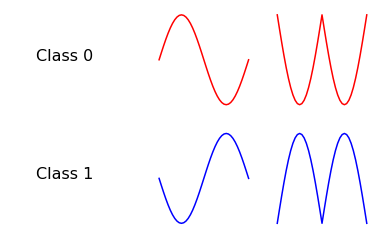

In [2]:
Fs = 8000
f = 5
sample = 1640

fig, ax = plt.subplots(2, 3)

x = np.arange(sample)

ts1 = np.sin(2 * np.pi * f * x / Fs)[::40]
ts2 = -np.abs(np.sin(2 * np.pi * f * x / Fs + np.pi))[::40]
ts3 = np.sin(2 * np.pi * f * x / Fs + np.pi)[::40]
ts4 = np.abs(np.sin(2 * np.pi * f * x / Fs + np.pi))[::40]

ax[0][1].plot(range(len(ts1)), ts1, c='r')
ax[0][1].axis('off')
ax[0][2].plot(range(len(ts2)), ts2, c='r')
ax[0][2].axis('off')
ax[1][1].plot(range(len(ts3)), ts3, c='b')
ax[1][1].axis('off')
ax[1][2].plot(range(len(ts4)), ts4, c='b')
ax[1][2].axis('off')

ax[0][0].axis('off')
ax[0][0].annotate('Class 0', (0, 0.5), fontsize=16)

ax[1][0].axis('off')
ax[1][0].annotate('Class 1', (0, 0.5), fontsize=16)

plt.savefig('shap_artificial.svg')

plt.show()

In [3]:
X = np.array([
    np.array(ts1),
    np.array(ts2),
    np.array(ts3),
    np.array(ts4)
])

y = np.array([
    0, 
    0, 
    1, 
    1
])

In [4]:
bfe = BruteForceExtractor()
bf_shapelet = bfe.extract(X, y)[0]

ge = GeneticExtractor(verbose=True, population_size=125, iterations=250, wait=100, mutation_prob=0.66, crossover_prob=0.66)
shapelets = ge.extract(X, y, metric='f')
gen_shapelet = shapelets[0]

clf = ShapeletModel(n_shapelets_per_size={len(ts1): 1}, 
                    max_iter=5000, verbose_level=1, batch_size=1,
                    optimizer='sgd', weight_regularizer=0)
clf.fit(
        np.reshape(
            X, 
            (X.shape[0], X.shape[1], 1)
        ), 
        y
    )
lts_shapelet = clf.shapelets_[0]

timeseries:  25%|██▌       | 1/4 [00:08<00:24,  8.06s/it]/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
timeseries: 100%|██████████| 4/4 [00:32<00:00,  8.02s/it]


it		avg		std		max		time
1		4.8976		16.964		186.055252	0.46
2		56.9044		167.78		1251.420449	0.3803
3		396.4325		996.663		8520.251923	0.2587
4		4098.0705		15105.717		129490.773215	0.1416
5		16245.872		32943.868		133460.079686	0.1058
6		24411.7421		46265.441		250323.452815	0.1144
7		29876.7139		63547.805		306390.17041	0.1058
8		99330.7903		272460.189		2197166.302364	0.1207
9		265406.27		698823.218		5049817.623538	0.1077
10		656111.6202		1441025.809		7239254.716861	0.1235
11		1623093.2821		2363919.107		7239254.716861	0.1215
12		1873382.1998		2640749.625		7239254.716861	0.1329
13		2128731.7359		3042128.375		8062470.821465	0.1233
14		2048494.4269		3035011.726		7239254.716861	0.1277
15		2543262.5171		3779704.886		24596261.885315	0.128
16		2721342.7389		5293452.626		24632503.215936	0.1265
17		5373589.8088		8386083.834		24909300.807302	0.1111
18		5960400.5133		9420802.538		24975735.26636	0.1232
19		6796700.8525		10564744.374		24975735.26636	0.119
20		9189198.1842		11712702.342		34712766.434741	

149		54341685.2935		77057541.308		233220796.924765	0.1376
150		58069287.0623		79188423.722		197604322.712771	0.1572
151		45910076.503		74062069.753		197604322.712771	0.1464
152		55273300.5988		79693640.94		231743829.221468	0.1295
153		56114430.8969		80682183.855		210858582.448667	0.1225
154		80831276.6015		431320252.251		4809193670.205497	0.1323
155		862563155.8577		1777567622.766		5318127940.446429	0.1274
156		1627695888.3899		2260184948.682		5318127940.446429	0.1192
157		1315067232.0866		2120951333.069		5318127940.446429	0.1315
158		1809888310.472		2339967910.615		5574373963.847233	0.1187
159		1523197274.7069		2231827098.153		5574373963.847233	0.1285
160		2029258226.5991		2410747884.765		5801299179.98554	0.1156
161		1577020623.1885		2304909192.966		5816042524.57351	0.1317
162		1898794483.9028		2412031831.74		5816042524.57351	0.1411
163		1697862190.1993		2351202777.759		5801299179.98554	0.1186
164		1631667005.443		2342911024.703		6100957852.31136	0.1182
165		1687128541.753		2379910843

4/4 [==============================] - 0s 5ms/step - loss: 0.6987 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6987
Epoch 15/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6986 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6986
Epoch 16/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6984 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6984
Epoch 17/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6983 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6983
Epoch 18/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6981 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6981
Epoch 19/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6980 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6980
Epoch 20/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6979 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6979
Epoch 21/5000
4/4 [==============================] - 0s 4ms/st

4/4 [==============================] - 0s 5ms/step - loss: 0.6930 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6930
Epoch 75/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6929
Epoch 76/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6928 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6928
Epoch 77/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6928 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6928
Epoch 78/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6927 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6927
Epoch 79/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6927 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6927
Epoch 80/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6926 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6926
Epoch 81/5000
4/4 [==============================] - 0s 5ms/st

4/4 [==============================] - 0s 6ms/step - loss: 0.6898 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6898
Epoch 135/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6897 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6897
Epoch 136/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6897 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6897
Epoch 137/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6896 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6896
Epoch 138/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6896 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6896
Epoch 139/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6895 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6895
Epoch 140/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6895 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6895
Epoch 141/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.6867 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6867
Epoch 194/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6867 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6867
Epoch 195/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6866 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6866
Epoch 196/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6866 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6866
Epoch 197/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6865 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6865
Epoch 198/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6865 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6865
Epoch 199/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6864 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6864
Epoch 200/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 5ms/step - loss: 0.6830 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6830
Epoch 253/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6829 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6829
Epoch 254/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6828 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6828
Epoch 255/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6828 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6828
Epoch 256/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6827 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6827
Epoch 257/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6826 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6826
Epoch 258/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6825 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6825
Epoch 259/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 3ms/step - loss: 0.6780 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6780
Epoch 312/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6779 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6779
Epoch 313/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6778 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6778
Epoch 314/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6777 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6777
Epoch 315/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6776 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6776
Epoch 316/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6775 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6775
Epoch 317/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6774 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6774
Epoch 318/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.6713 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6713
Epoch 371/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6712 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6712
Epoch 372/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6711 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6711
Epoch 373/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6709 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6709
Epoch 374/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6708 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6708
Epoch 375/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6707 - binary_accuracy: 0.5000 - binary_crossentropy: 0.6707
Epoch 376/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.6705 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6705
Epoch 377/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 7ms/step - loss: 0.6624 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6624
Epoch 430/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6622 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6622
Epoch 431/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6620 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6620
Epoch 432/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6618 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6618
Epoch 433/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6617 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6617
Epoch 434/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6615 - binary_accuracy: 0.7500 - binary_crossentropy: 0.6615
Epoch 435/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6613 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6613
Epoch 436/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 6ms/step - loss: 0.6504 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6504
Epoch 489/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6502 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6502
Epoch 490/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6500 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6500
Epoch 491/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6497 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6497
Epoch 492/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6495 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6495
Epoch 493/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6493 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6493
Epoch 494/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6490 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6490
Epoch 495/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 5ms/step - loss: 0.6347 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6347
Epoch 548/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6344 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6344
Epoch 549/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6341 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6341
Epoch 550/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6338 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6338
Epoch 551/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6335 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6335
Epoch 552/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6332 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6332
Epoch 553/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6329 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6329
Epoch 554/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.6144 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6144
Epoch 607/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.6140 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6140
Epoch 608/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.6136 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6136
Epoch 609/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6132 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6132
Epoch 610/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.6128 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6128
Epoch 611/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.6125 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6125
Epoch 612/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.6121 - binary_accuracy: 1.0000 - binary_crossentropy: 0.6121
Epoch 613/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 5ms/step - loss: 0.5889 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5889
Epoch 666/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.5884 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5884
Epoch 667/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.5879 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5879
Epoch 668/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.5874 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5874
Epoch 669/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.5869 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5869
Epoch 670/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.5865 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5865
Epoch 671/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.5860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5860
Epoch 672/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.5578 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5578
Epoch 725/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.5572 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5572
Epoch 726/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.5567 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5567
Epoch 727/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.5561 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5561
Epoch 728/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.5555 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5555
Epoch 729/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.5549 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5549
Epoch 730/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.5544 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5544
Epoch 731/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.5216 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5216
Epoch 784/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.5209 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5209
Epoch 785/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.5202 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5202
Epoch 786/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.5196 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5196
Epoch 787/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.5189 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5189
Epoch 788/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.5183 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5183
Epoch 789/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.5176 - binary_accuracy: 1.0000 - binary_crossentropy: 0.5176
Epoch 790/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.4811 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4811
Epoch 843/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.4804 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4804
Epoch 844/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.4797 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4797
Epoch 845/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.4790 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4790
Epoch 846/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.4783 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4783
Epoch 847/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.4775 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4775
Epoch 848/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.4768 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4768
Epoch 849/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.4382 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4382
Epoch 902/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.4375 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4375
Epoch 903/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.4368 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4368
Epoch 904/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.4360 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4360
Epoch 905/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.4353 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4353
Epoch 906/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.4346 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4346
Epoch 907/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.4338 - binary_accuracy: 1.0000 - binary_crossentropy: 0.4338
Epoch 908/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 7ms/step - loss: 0.3950 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3950
Epoch 961/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.3943 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3943
Epoch 962/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.3936 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3936
Epoch 963/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3929 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3929
Epoch 964/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3921 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3921
Epoch 965/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3914 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3914
Epoch 966/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3907 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3907
Epoch 967/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/step - loss: 0.3534 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3534
Epoch 1020/5000
4/4 [==============================] - 0s 9ms/step - loss: 0.3528 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3528
Epoch 1021/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.3521 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3521
Epoch 1022/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.3514 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3514
Epoch 1023/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.3507 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3507
Epoch 1024/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.3500 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3500
Epoch 1025/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3494 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3494
Epoch 1026/5000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.3150 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3150
Epoch 1079/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3144 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3144
Epoch 1080/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.3138 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3138
Epoch 1081/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.3131 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3131
Epoch 1082/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.3125 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3125
Epoch 1083/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3119 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3119
Epoch 1084/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3113 - binary_accuracy: 1.0000 - binary_crossentropy: 0.3113
Epoch 1085/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.2805 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2805
Epoch 1138/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2799 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2799
Epoch 1139/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.2794 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2794
Epoch 1140/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.2788 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2788
Epoch 1141/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2783 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2783
Epoch 1142/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.2778 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2778
Epoch 1143/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.2772 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2772
Epoch 1144/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.2502 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2502
Epoch 1197/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2497 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2497
Epoch 1198/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2492 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2492
Epoch 1199/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2488 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2488
Epoch 1200/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.2483 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2483
Epoch 1201/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2478 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2478
Epoch 1202/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.2473 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2473
Epoch 1203/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.2243 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2243
Epoch 1255/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2239 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2239
Epoch 1256/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2235 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2235
Epoch 1257/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2231 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2231
Epoch 1258/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2227 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2227
Epoch 1259/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2223 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2223
Epoch 1260/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2219 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2219
Epoch 1261/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.2017 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2017
Epoch 1314/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2013 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2013
Epoch 1315/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2010 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2010
Epoch 1316/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2006 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2006
Epoch 1317/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2003 - binary_accuracy: 1.0000 - binary_crossentropy: 0.2003
Epoch 1318/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1999 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1999
Epoch 1319/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1996 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1996
Epoch 1320/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.1826 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1826
Epoch 1372/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1823 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1823
Epoch 1373/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1820 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1820
Epoch 1374/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1817 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1817
Epoch 1375/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1814 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1814
Epoch 1376/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1811 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1811
Epoch 1377/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1808 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1808
Epoch 1378/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.1658 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1658
Epoch 1431/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1656 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1656
Epoch 1432/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1653 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1653
Epoch 1433/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.1651 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1651
Epoch 1434/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1648 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1648
Epoch 1435/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.1645 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1645
Epoch 1436/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1643 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1643
Epoch 1437/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.1514 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1514
Epoch 1490/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1512 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1512
Epoch 1491/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1510 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1510
Epoch 1492/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1508 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1508
Epoch 1493/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1505 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1505
Epoch 1494/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1503 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1503
Epoch 1495/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1501 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1501
Epoch 1496/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.1390 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1390
Epoch 1549/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1388 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1388
Epoch 1550/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1386 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1386
Epoch 1551/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1384 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1384
Epoch 1552/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1382 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1382
Epoch 1553/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1380 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1380
Epoch 1554/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1378 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1378
Epoch 1555/5000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.1282 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1282
Epoch 1608/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1280
Epoch 1609/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1278 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1278
Epoch 1610/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1277 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1277
Epoch 1611/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.1275 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1275
Epoch 1612/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1273 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1273
Epoch 1613/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1272 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1272
Epoch 1614/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.1187 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1187
Epoch 1667/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1186 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1186
Epoch 1668/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1184 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1184
Epoch 1669/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1183 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1183
Epoch 1670/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1181 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1181
Epoch 1671/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1180 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1180
Epoch 1672/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1178 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1178
Epoch 1673/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.1106 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1106
Epoch 1725/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1104 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1104
Epoch 1726/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1103 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1103
Epoch 1727/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1102 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1102
Epoch 1728/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1100 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1100
Epoch 1729/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1099 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1099
Epoch 1730/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1098 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1098
Epoch 1731/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.1035 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1035
Epoch 1782/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1034 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1034
Epoch 1783/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.1032 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1032
Epoch 1784/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1031 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1031
Epoch 1785/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1030 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1030
Epoch 1786/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.1029 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1029
Epoch 1787/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.1028 - binary_accuracy: 1.0000 - binary_crossentropy: 0.1028
Epoch 1788/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0970 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0970
Epoch 1840/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0969 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0969
Epoch 1841/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0968 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0968
Epoch 1842/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0967 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0967
Epoch 1843/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0966 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0966
Epoch 1844/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0965 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0965
Epoch 1845/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0964 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0964
Epoch 1846/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0914 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0914
Epoch 1897/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0913 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0913
Epoch 1898/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0912 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0912
Epoch 1899/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0911 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0911
Epoch 1900/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0910 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0910
Epoch 1901/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0909 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0909
Epoch 1902/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0908 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0908
Epoch 1903/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0862 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0862
Epoch 1955/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0862 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0862
Epoch 1956/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0861 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0861
Epoch 1957/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0860 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0860
Epoch 1958/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0859 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0859
Epoch 1959/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0858 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0858
Epoch 1960/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.0857 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0857
Epoch 1961/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0815 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0815
Epoch 2014/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0814 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0814
Epoch 2015/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0814 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0814
Epoch 2016/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0813 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0813
Epoch 2017/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0812 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0812
Epoch 2018/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0811 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0811
Epoch 2019/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0811 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0811
Epoch 2020/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0772 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0772
Epoch 2073/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0772 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0772
Epoch 2074/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0771 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0771
Epoch 2075/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0770 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0770
Epoch 2076/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0770 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0770
Epoch 2077/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0769 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0769
Epoch 2078/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0768 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0768
Epoch 2079/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0734 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0734
Epoch 2132/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0733 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0733
Epoch 2133/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0732 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0732
Epoch 2134/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0732 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0732
Epoch 2135/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0731 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0731
Epoch 2136/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0731 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0731
Epoch 2137/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0730 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0730
Epoch 2138/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0699 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0699
Epoch 2190/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.0699 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0699
Epoch 2191/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0698 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0698
Epoch 2192/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0697 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0697
Epoch 2193/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.0697 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0697
Epoch 2194/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0696 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0696
Epoch 2195/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0696 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0696
Epoch 2196/5000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0667 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0667
Epoch 2248/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0667 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0667
Epoch 2249/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.0666 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0666
Epoch 2250/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0666 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0666
Epoch 2251/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0665 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0665
Epoch 2252/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0665 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0665
Epoch 2253/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0664 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0664
Epoch 2254/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0638 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0638
Epoch 2307/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0637 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0637
Epoch 2308/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0637 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0637
Epoch 2309/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0636 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0636
Epoch 2310/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0636 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0636
Epoch 2311/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0635 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0635
Epoch 2312/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0635 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0635
Epoch 2313/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0611 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0611
Epoch 2366/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0610 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0610
Epoch 2367/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0610 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0610
Epoch 2368/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0609 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0609
Epoch 2369/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0609 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0609
Epoch 2370/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0608 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0608
Epoch 2371/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0608 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0608
Epoch 2372/5000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0586 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0586
Epoch 2424/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0586 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0586
Epoch 2425/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0585 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0585
Epoch 2426/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0585 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0585
Epoch 2427/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0584 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0584
Epoch 2428/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0584 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0584
Epoch 2429/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0584 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0584
Epoch 2430/5000
4/4 [=============================

4/4 [==============================] - 0s 7ms/step - loss: 0.0563 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0563
Epoch 2483/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0562 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0562
Epoch 2484/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0562 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0562
Epoch 2485/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0562 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0562
Epoch 2486/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0561 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0561
Epoch 2487/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0561 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0561
Epoch 2488/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0560 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0560
Epoch 2489/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0542 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0542
Epoch 2541/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0541 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0541
Epoch 2542/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0541 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0541
Epoch 2543/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0541 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0541
Epoch 2544/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0540 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0540
Epoch 2545/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0540 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0540
Epoch 2546/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0539 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0539
Epoch 2547/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0522 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0522
Epoch 2600/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0521 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0521
Epoch 2601/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0521 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0521
Epoch 2602/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0521 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0521
Epoch 2603/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0520 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0520
Epoch 2604/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0520 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0520
Epoch 2605/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0520 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0520
Epoch 2606/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0503 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0503
Epoch 2659/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0503 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0503
Epoch 2660/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0502 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0502
Epoch 2661/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0502 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0502
Epoch 2662/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0502 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0502
Epoch 2663/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0501 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0501
Epoch 2664/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0501 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0501
Epoch 2665/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0486 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0486
Epoch 2717/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0486 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0486
Epoch 2718/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0485 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0485
Epoch 2719/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0485 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0485
Epoch 2720/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0485 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0485
Epoch 2721/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0484 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0484
Epoch 2722/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0484 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0484
Epoch 2723/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0470 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0470
Epoch 2775/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0470 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0470
Epoch 2776/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0469 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0469
Epoch 2777/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0469 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0469
Epoch 2778/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0469 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0469
Epoch 2779/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0468 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0468
Epoch 2780/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0468 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0468
Epoch 2781/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0454 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0454
Epoch 2834/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0454 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0454
Epoch 2835/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0454 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0454
Epoch 2836/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0454 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0454
Epoch 2837/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0453 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0453
Epoch 2838/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0453 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0453
Epoch 2839/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0453 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0453
Epoch 2840/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0440 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0440
Epoch 2892/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0440 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0440
Epoch 2893/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0440 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0440
Epoch 2894/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0440 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0440
Epoch 2895/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0439 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0439
Epoch 2896/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0439 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0439
Epoch 2897/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0439 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0439
Epoch 2898/5000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0427 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0427
Epoch 2951/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0427 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0427
Epoch 2952/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0426 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0426
Epoch 2953/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0426 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0426
Epoch 2954/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0426 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0426
Epoch 2955/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0426 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0426
Epoch 2956/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0426 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0426
Epoch 2957/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0414 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0414
Epoch 3009/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0414 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0414
Epoch 3010/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0414 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0414
Epoch 3011/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0414 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0414
Epoch 3012/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0413 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0413
Epoch 3013/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0413 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0413
Epoch 3014/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0413 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0413
Epoch 3015/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0402 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0402
Epoch 3068/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0402 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0402
Epoch 3069/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0402 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0402
Epoch 3070/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0402 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0402
Epoch 3071/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0402 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0402
Epoch 3072/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0401 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0401
Epoch 3073/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0401 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0401
Epoch 3074/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0391 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0391
Epoch 3126/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0391 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0391
Epoch 3127/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0391 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0391
Epoch 3128/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0391 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0391
Epoch 3129/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0390 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0390
Epoch 3130/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0390 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0390
Epoch 3131/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0390 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0390
Epoch 3132/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0381 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0381
Epoch 3183/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0381 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0381
Epoch 3184/5000
4/4 [==============================] - ETA: 0s - loss: 0.0561 - binary_accuracy: 1.0000 - binary_crossentropy: 0.056 - 0s 4ms/step - loss: 0.0380 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0380
Epoch 3185/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0380 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0380
Epoch 3186/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0380 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0380
Epoch 3187/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0380 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0380
Epoch 3188/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0380 - binary_accuracy: 1.0000 

4/4 [==============================] - 0s 5ms/step - loss: 0.0371 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0371
Epoch 3241/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0370 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0370
Epoch 3242/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0370 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0370
Epoch 3243/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0370 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0370
Epoch 3244/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0370 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0370
Epoch 3245/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0370 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0370
Epoch 3246/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0370 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0370
Epoch 3247/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0361 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0361
Epoch 3300/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0361 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0361
Epoch 3301/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0361 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0361
Epoch 3302/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0360 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0360
Epoch 3303/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0360 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0360
Epoch 3304/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0360 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0360
Epoch 3305/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0360 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0360
Epoch 3306/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0352 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0352
Epoch 3358/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0352 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0352
Epoch 3359/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0352 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0352
Epoch 3360/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0351 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0351
Epoch 3361/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0351 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0351
Epoch 3362/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0351 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0351
Epoch 3363/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0351 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0351
Epoch 3364/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0343 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0343
Epoch 3417/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0343 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0343
Epoch 3418/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0343 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0343
Epoch 3419/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0343 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0343
Epoch 3420/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0343 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0343
Epoch 3421/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0342 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0342
Epoch 3422/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0342 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0342
Epoch 3423/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0335 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0335
Epoch 3476/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0335 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0335
Epoch 3477/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0334 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0334
Epoch 3478/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0334 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0334
Epoch 3479/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0334 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0334
Epoch 3480/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0334 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0334
Epoch 3481/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0334 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0334
Epoch 3482/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0327 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0327
Epoch 3535/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0327 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0327
Epoch 3536/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0327 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0327
Epoch 3537/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0326 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0326
Epoch 3538/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0326 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0326
Epoch 3539/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0326 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0326
Epoch 3540/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0326 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0326
Epoch 3541/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0319 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0319
Epoch 3593/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0319 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0319
Epoch 3594/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0319 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0319
Epoch 3595/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0319 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0319
Epoch 3596/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0319 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0319
Epoch 3597/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0319 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0319
Epoch 3598/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0319 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0319
Epoch 3599/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0312 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0312
Epoch 3651/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0312 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0312
Epoch 3652/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0312 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0312
Epoch 3653/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0312 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0312
Epoch 3654/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0312 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0312
Epoch 3655/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0312 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0312
Epoch 3656/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0311 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0311
Epoch 3657/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0305 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0305
Epoch 3709/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0305 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0305
Epoch 3710/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0305 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0305
Epoch 3711/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0305 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0305
Epoch 3712/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0305 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0305
Epoch 3713/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0305 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0305
Epoch 3714/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0305 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0305
Epoch 3715/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0299 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0299
Epoch 3767/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0299 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0299
Epoch 3768/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0299 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0299
Epoch 3769/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0298 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0298
Epoch 3770/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0298 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0298
Epoch 3771/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0298 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0298
Epoch 3772/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0298 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0298
Epoch 3773/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0292 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0292
Epoch 3825/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0292 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0292
Epoch 3826/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0292 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0292
Epoch 3827/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0292 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0292
Epoch 3828/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0292 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0292
Epoch 3829/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0292 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0292
Epoch 3830/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0292 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0292
Epoch 3831/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0286 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0286
Epoch 3884/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0286 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0286
Epoch 3885/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0286 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0286
Epoch 3886/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0286 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0286
Epoch 3887/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0286 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0286
Epoch 3888/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0286 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0286
Epoch 3889/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0286 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0286
Epoch 3890/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0280
Epoch 3943/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0280
Epoch 3944/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0280
Epoch 3945/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0280
Epoch 3946/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0280
Epoch 3947/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0280
Epoch 3948/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0280 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0280
Epoch 3949/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0275 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0275
Epoch 4002/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0275 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0275
Epoch 4003/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0275 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0275
Epoch 4004/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0275 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0275
Epoch 4005/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0274 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0274
Epoch 4006/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0274 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0274
Epoch 4007/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0274 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0274
Epoch 4008/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0269 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0269
Epoch 4061/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0269 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0269
Epoch 4062/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0269 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0269
Epoch 4063/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0269 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0269
Epoch 4064/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0269 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0269
Epoch 4065/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0269 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0269
Epoch 4066/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0269 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0269
Epoch 4067/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0264
Epoch 4119/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0264 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0264
Epoch 4120/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0264
Epoch 4121/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0264
Epoch 4122/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0264
Epoch 4123/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0264 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0264
Epoch 4124/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0264 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0264
Epoch 4125/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0259 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0259
Epoch 4178/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0259 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0259
Epoch 4179/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0259 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0259
Epoch 4180/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0259 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0259
Epoch 4181/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0259 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0259
Epoch 4182/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0259 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0259
Epoch 4183/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0259 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0259
Epoch 4184/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0254 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0254
Epoch 4237/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0254 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0254
Epoch 4238/5000
4/4 [==============================] - ETA: 0s - loss: 0.0131 - binary_accuracy: 1.0000 - binary_crossentropy: 0.013 - 0s 4ms/step - loss: 0.0254 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0254
Epoch 4239/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0254 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0254
Epoch 4240/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0254 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0254
Epoch 4241/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0254 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0254
Epoch 4242/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0254 - binary_accuracy: 1.0000 

4/4 [==============================] - 0s 5ms/step - loss: 0.0250 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0250
Epoch 4295/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0250 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0250
Epoch 4296/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0250 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0250
Epoch 4297/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0250 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0250
Epoch 4298/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0249 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0249
Epoch 4299/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0249 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0249
Epoch 4300/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0249 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0249
Epoch 4301/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0245 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0245
Epoch 4353/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0245 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0245
Epoch 4354/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0245 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0245
Epoch 4355/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0245 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0245
Epoch 4356/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0245 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0245
Epoch 4357/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0245 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0245
Epoch 4358/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0245 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0245
Epoch 4359/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0241 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0241
Epoch 4411/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0241 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0241
Epoch 4412/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0241 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0241
Epoch 4413/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0241 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0241
Epoch 4414/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0241 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0241
Epoch 4415/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0241 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0241
Epoch 4416/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0241 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0241
Epoch 4417/5000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0237 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0237
Epoch 4469/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0237 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0237
Epoch 4470/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0237 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0237
Epoch 4471/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0237 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0237
Epoch 4472/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0237 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0237
Epoch 4473/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0237 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0237
Epoch 4474/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0237 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0237
Epoch 4475/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0233 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0233
Epoch 4527/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0233 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0233
Epoch 4528/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0233 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0233
Epoch 4529/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0233 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0233
Epoch 4530/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0233 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0233
Epoch 4531/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0233 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0233
Epoch 4532/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0233 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0233
Epoch 4533/5000
4/4 [=============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0229 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0229
Epoch 4586/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0229 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0229
Epoch 4587/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0229 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0229
Epoch 4588/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0229 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0229
Epoch 4589/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0229 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0229
Epoch 4590/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0229 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0229
Epoch 4591/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0229 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0229
Epoch 4592/5000
4/4 [=============================

4/4 [==============================] - 0s 7ms/step - loss: 0.0225 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0225
Epoch 4644/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0225
Epoch 4645/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0225 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0225
Epoch 4646/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0225 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0225
Epoch 4647/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.0225 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0225
Epoch 4648/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0225 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0225
Epoch 4649/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0225 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0225
Epoch 4650/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0222 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0222
Epoch 4703/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.0222 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0222
Epoch 4704/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0222 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0222
Epoch 4705/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0221 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0221
Epoch 4706/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0221 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0221
Epoch 4707/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0221 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0221
Epoch 4708/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0221 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0221
Epoch 4709/5000
4/4 [=============================

4/4 [==============================] - 0s 4ms/step - loss: 0.0218 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0218
Epoch 4762/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0218 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0218
Epoch 4763/5000
4/4 [==============================] - 0s 9ms/step - loss: 0.0218 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0218
Epoch 4764/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0218
Epoch 4765/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0218
Epoch 4766/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0218 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0218
Epoch 4767/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0218 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0218
Epoch 4768/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0215 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0215
Epoch 4821/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0215 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0215
Epoch 4822/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0215 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0215
Epoch 4823/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0214 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0214
Epoch 4824/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0214 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0214
Epoch 4825/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0214 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0214
Epoch 4826/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0214 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0214
Epoch 4827/5000
4/4 [=============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0211 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0211
Epoch 4880/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0211 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0211
Epoch 4881/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0211 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0211
Epoch 4882/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0211 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0211
Epoch 4883/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0211 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0211
Epoch 4884/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0211 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0211
Epoch 4885/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0211 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0211
Epoch 4886/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0208 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0208
Epoch 4939/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0208 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0208
Epoch 4940/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0208 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0208
Epoch 4941/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0208 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0208
Epoch 4942/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0208 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0208
Epoch 4943/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0208 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0208
Epoch 4944/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0208 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0208
Epoch 4945/5000
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.0205 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0205
Epoch 4998/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0205 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0205
Epoch 4999/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0205 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0205
Epoch 5000/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.0205 - binary_accuracy: 1.0000 - binary_crossentropy: 0.0205


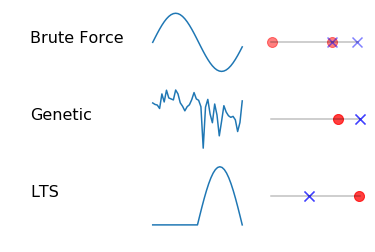

In [11]:
fig, ax = plt.subplots(3, 3)


ax[0][0].axis('off')
ax[0][0].annotate('Brute Force', (0, 0.5), fontsize=16)

ax[0][1].axis('off')
ax[0][1].plot(range(len(bf_shapelet)), bf_shapelet)

dist_ts1 = util.sdist_no_norm(bf_shapelet, ts1)
dist_ts2 = util.sdist_no_norm(bf_shapelet, ts2)
dist_ts3 = util.sdist_no_norm(bf_shapelet, ts3)
dist_ts4 = util.sdist_no_norm(bf_shapelet, ts4)
ax[0][2].scatter([dist_ts1, dist_ts2], [0, 0], c='r', alpha=0.5, s=100)
ax[0][2].scatter([dist_ts3, dist_ts4], [0, 0], c='b', marker='x', alpha=0.5, s=100)
ax[0][2].plot([-0.1, max([dist_ts1, dist_ts2, dist_ts3, dist_ts4]) + 0.1], [0, 0], c='k', alpha=0.25)
ax[0][2].axis('off')


ax[1][0].axis('off')
ax[1][0].annotate('Genetic', (0, 0.5), fontsize=16)

ax[1][1].axis('off')
ax[1][1].plot(range(len(gen_shapelet)), gen_shapelet)

dist_ts1 = util.sdist_no_norm(gen_shapelet, ts1)
dist_ts2 = util.sdist_no_norm(gen_shapelet, ts2)
dist_ts3 = util.sdist_no_norm(gen_shapelet, ts3)
dist_ts4 = util.sdist_no_norm(gen_shapelet, ts4)
ax[1][2].scatter([dist_ts1, dist_ts2], [0, 0], c='r', alpha=0.5, s=100)
ax[1][2].scatter([dist_ts3, dist_ts4], [0, 0], c='b', marker='x', alpha=0.5, s=100)
ax[1][2].plot([-0.1, max([dist_ts1, dist_ts2, dist_ts3, dist_ts4]) + 0.1], [0, 0], c='k', alpha=0.25)
ax[1][2].axis('off')


ax[2][0].axis('off')
ax[2][0].annotate('LTS', (0, 0.5), fontsize=16)

ax[2][1].axis('off')
ax[2][1].plot(range(len(lts_shapelet)), lts_shapelet)

dist_ts1 = util.sdist_no_norm(lts_shapelet, ts1)
dist_ts2 = util.sdist_no_norm(lts_shapelet, ts2)
dist_ts3 = util.sdist_no_norm(lts_shapelet, ts3)
dist_ts4 = util.sdist_no_norm(lts_shapelet, ts4)
ax[2][2].scatter([dist_ts1, dist_ts2], [0, 0], c='r', alpha=0.5, s=100)
ax[2][2].scatter([dist_ts3, dist_ts4], [0, 0], c='b', marker='x', alpha=0.5, s=100)
ax[2][2].plot([-0.1, max([dist_ts1, dist_ts2, dist_ts3, dist_ts4]) + 0.1], [0, 0], c='k', alpha=0.25)
ax[2][2].axis('off')


plt.savefig('extracted_shapelets.svg')
plt.show()